# DBSCAN 

Hands on! Another notebook??? Yes. More toy data? Yes!. Can you guess why? In real life, many datasets are not linearly separable, neither have clear shapes. Datasets for DBSCAN are hard to find, but it usually works great for spacial data. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler

In [34]:
df = pd.read_csv("0",header=None,delim_whitespace=True)

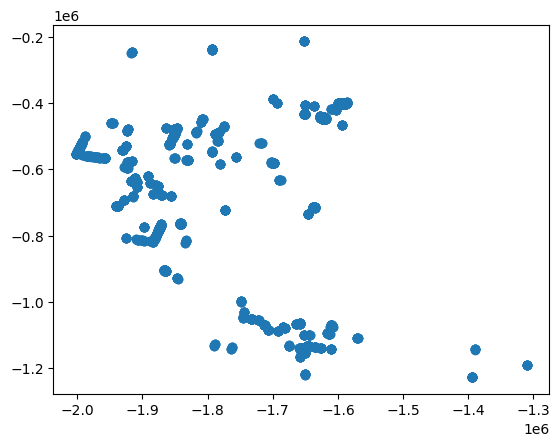

In [35]:
plt.scatter(df[0], df[1])
plt.show()

In [36]:
#Check the data, is there a need for any preprocessing?
X = df.to_numpy()
X

array([[-1652585,  -214432],
       [-1652462,  -214142],
       [-1652569,  -214594],
       ...,
       [-1717280,  -520794],
       [-1717280,  -520794],
       [-1721782,  -519416]], dtype=int64)

In [37]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
clustering = DBSCAN(eps=10, min_samples=2).fit(X)

In [38]:
# Try different values for eps and min_samples
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [2, 3, 4,5,6]

# Calculate silhouette score for each combination of eps and min_samples
best_score = -1
best_eps = None
best_min_samples = None
for eps in eps_values:
    for min_samples in min_samples_values:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = clustering.labels_
        if len(set(labels)) > 1:  # Silhouette score requires more than one cluster
            score = metrics.silhouette_score(X, labels)
            print(f"eps={eps}, min_samples={min_samples}, silhouette score={score:.2f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}, silhouette score={best_score:.2f}")

clustering = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X)

eps=0.5, min_samples=2, silhouette score=-0.34
eps=0.5, min_samples=3, silhouette score=-0.83
eps=0.5, min_samples=4, silhouette score=-0.83
eps=1.0, min_samples=2, silhouette score=-0.34
eps=1.0, min_samples=3, silhouette score=-0.83
eps=1.0, min_samples=4, silhouette score=-0.83
eps=1.5, min_samples=2, silhouette score=-0.34
eps=1.5, min_samples=3, silhouette score=-0.83
eps=1.5, min_samples=4, silhouette score=-0.83
eps=2.0, min_samples=2, silhouette score=-0.34
eps=2.0, min_samples=3, silhouette score=-0.83
eps=2.0, min_samples=4, silhouette score=-0.83
Best parameters: eps=0.5, min_samples=2, silhouette score=-0.34


In [39]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 500
Estimated number of noise points: 2091
Silhouette Coefficient: -0.340


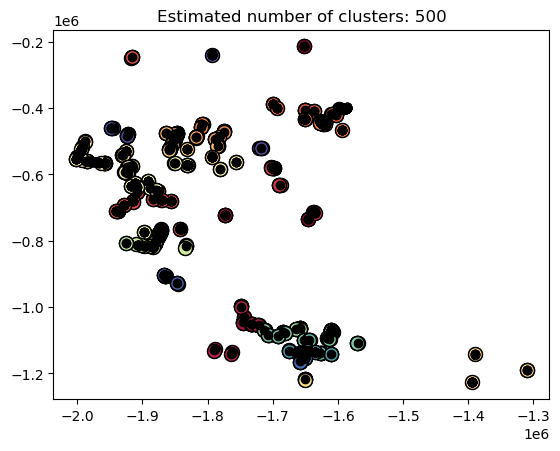

In [40]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Nice! Now find the best $\epsilon$ and min_samples for this dataset.  
After that, repeat the process using the 91 and 33 files.

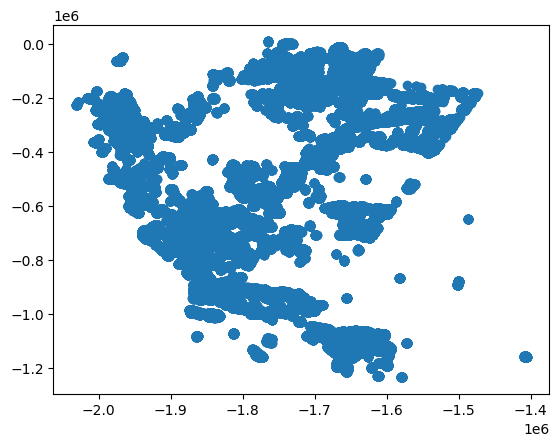

eps=0.5, min_samples=2, silhouette score=-0.82
eps=0.5, min_samples=3, silhouette score=-0.94
eps=0.5, min_samples=4, silhouette score=-0.94
eps=0.5, min_samples=5, silhouette score=-0.80
eps=0.5, min_samples=6, silhouette score=-0.80
eps=1.0, min_samples=2, silhouette score=-0.82
eps=1.0, min_samples=3, silhouette score=-0.94
eps=1.0, min_samples=4, silhouette score=-0.94
eps=1.0, min_samples=5, silhouette score=-0.80
eps=1.0, min_samples=6, silhouette score=-0.80
eps=1.5, min_samples=2, silhouette score=-0.82
eps=1.5, min_samples=3, silhouette score=-0.94
eps=1.5, min_samples=4, silhouette score=-0.94
eps=1.5, min_samples=5, silhouette score=-0.80
eps=1.5, min_samples=6, silhouette score=-0.80
eps=2.0, min_samples=2, silhouette score=-0.82
eps=2.0, min_samples=3, silhouette score=-0.94
eps=2.0, min_samples=4, silhouette score=-0.94
eps=2.0, min_samples=5, silhouette score=-0.80
eps=2.0, min_samples=6, silhouette score=-0.80
Best parameters: eps=0.5, min_samples=5, silhouette score=-0

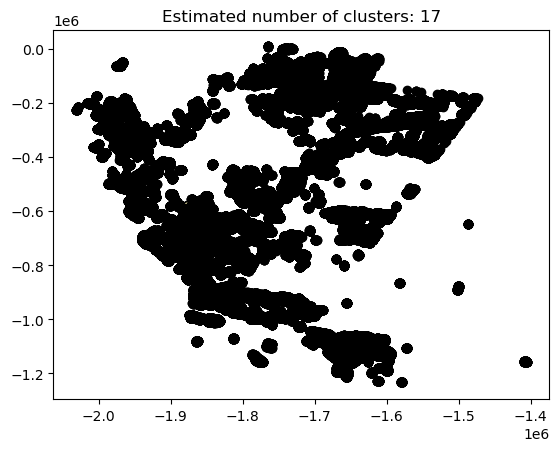

In [5]:
df = pd.read_csv("33",header=None,delim_whitespace=True)
plt.scatter(df[0], df[1])
plt.show()
X = df.to_numpy()
clustering = DBSCAN(eps=10, min_samples=2).fit(X)
# Try different values for eps and min_samples
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [2, 3, 4,5,6]

# Calculate silhouette score for each combination of eps and min_samples
best_score = -1
best_eps = None
best_min_samples = None
for eps in eps_values:
    for min_samples in min_samples_values:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = clustering.labels_
        if len(set(labels)) > 1:  # Silhouette score requires more than one cluster
            score = metrics.silhouette_score(X, labels)
            print(f"eps={eps}, min_samples={min_samples}, silhouette score={score:.2f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}, silhouette score={best_score:.2f}")

clustering = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

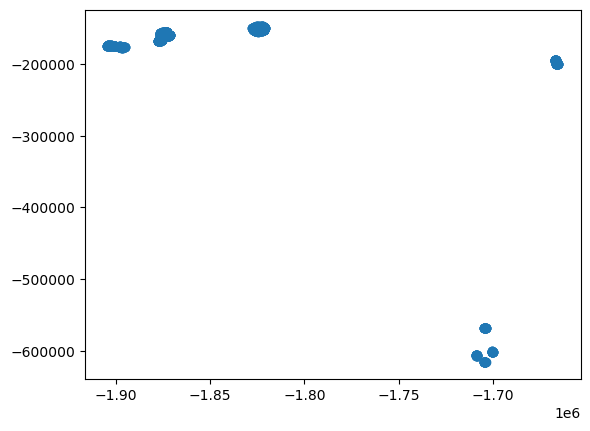

eps=0.5, min_samples=2, silhouette score=-0.81
eps=1.0, min_samples=2, silhouette score=-0.81
eps=1.5, min_samples=2, silhouette score=-0.81
eps=2.0, min_samples=2, silhouette score=-0.81
Best parameters: eps=0.5, min_samples=2, silhouette score=-0.81
Estimated number of clusters: 28
Estimated number of noise points: 580
Silhouette Coefficient: -0.809


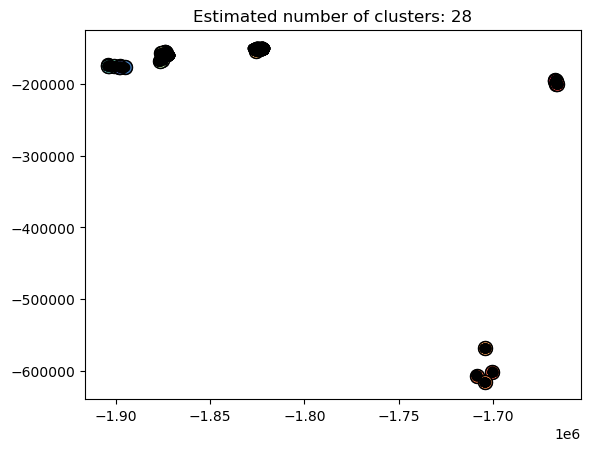

In [6]:
df = pd.read_csv("91",header=None,delim_whitespace=True)
plt.scatter(df[0], df[1])
plt.show()
X = df.to_numpy()
clustering = DBSCAN(eps=10, min_samples=2).fit(X)
# Try different values for eps and min_samples
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [2, 3, 4,5,6]

# Calculate silhouette score for each combination of eps and min_samples
best_score = -1
best_eps = None
best_min_samples = None
for eps in eps_values:
    for min_samples in min_samples_values:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = clustering.labels_
        if len(set(labels)) > 1:  # Silhouette score requires more than one cluster
            score = metrics.silhouette_score(X, labels)
            print(f"eps={eps}, min_samples={min_samples}, silhouette score={score:.2f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}, silhouette score={best_score:.2f}")

clustering = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()